###  Problem Statement: 

#### This EDA project analyzes historical vehicle registration trends in the U.S. from 1900 to 2020 using a vehicle registration dataset. The goal is to explore patterns in vehicle types (e.g., auto, truck, bus) and regional variations across states to understand growth and distribution over time.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Objective 1 : Load and Validate the Dataset

* loading the dataset and verifying its integrity, displaying the structure.

In [3]:
# Load the dataset
df = pd.read_csv('5.Motor_Vehicle_Registrations_Dashboard_data.csv')

In [4]:
# Check shape and columns
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (6293, 6)
Columns: ['year', 'state', 'Auto', 'Bus', 'Truck', 'Motorcycle']


In [5]:
# Check first few rows
print("\nFirst 5 Rows:\n", df.head())


First 5 Rows:
    year       state   Auto  Bus  Truck  Motorcycle
0  1900     Alabama   40.0  0.0    0.0         0.0
1  1900      Alaska    0.0  0.0    0.0         0.0
2  1900     Arizona   20.0  0.0    0.0         0.0
3  1900    Arkansas   20.0  0.0    0.0         0.0
4  1900  California  780.0  0.0    0.0         0.0


In [6]:
# Check data types and missing values
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Data Types:
 year            int64
state          object
Auto          float64
Bus           float64
Truck         float64
Motorcycle    float64
dtype: object

Missing Values:
 year            0
state           0
Auto          122
Bus           122
Truck         122
Motorcycle    122
dtype: int64


* Check which rows have missing values to understand their context.

In [23]:
# Identify rows with missing values (before cleaning)
missing_rows = df[df[['Auto', 'Bus', 'Truck', 'Motorcycle']].isnull().any(axis=1)]
print("\nRows with Missing Values:\n", missing_rows.head())


Rows with Missing Values:
 Empty DataFrame
Columns: [year, state, Auto, Bus, Truck, Motorcycle]
Index: []


* Checking for unique years and states to ensure completeness (1900–2020 and all 50 states + DC).

In [24]:
print("\nUnique Years:", sorted(df['year'].unique()))
print("Unique States:", sorted(df['state'].unique()))


Unique Years: [np.int64(1900), np.int64(1901), np.int64(1902), np.int64(1903), np.int64(1904), np.int64(1905), np.int64(1906), np.int64(1907), np.int64(1908), np.int64(1909), np.int64(1910), np.int64(1911), np.int64(1912), np.int64(1913), np.int64(1914), np.int64(1915), np.int64(1916), np.int64(1917), np.int64(1918), np.int64(1919), np.int64(1920), np.int64(1921), np.int64(1922), np.int64(1923), np.int64(1924), np.int64(1925), np.int64(1926), np.int64(1927), np.int64(1928), np.int64(1929), np.int64(1930), np.int64(1931), np.int64(1932), np.int64(1933), np.int64(1934), np.int64(1935), np.int64(1936), np.int64(1937), np.int64(1938), np.int64(1939), np.int64(1940), np.int64(1941), np.int64(1942), np.int64(1943), np.int64(1944), np.int64(1945), np.int64(1946), np.int64(1947), np.int64(1948), np.int64(1949), np.int64(1950), np.int64(1951), np.int64(1952), np.int64(1953), np.int64(1954), np.int64(1955), np.int64(1956), np.int64(1957), np.int64(1958), np.int64(1959), np.int64(1960), np.int64

### Objective 2: Perform Data Cleaning and Preprocessing

* Since there are 122 missing values in Auto, Bus, Truck, and Motorcycle handling these and also checking for inconsistencies and convert data types if necessary

In [7]:
# Check for duplicates
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [8]:
# Handle missing values (fill with 0 for now, assuming no data means 0 registrations)
df['Auto'] = df['Auto'].fillna(0)
df['Bus'] = df['Bus'].fillna(0)
df['Truck'] = df['Truck'].fillna(0)
df['Motorcycle'] = df['Motorcycle'].fillna(0)

In [9]:
# Verify missing values are handled
print("\nMissing Values After Cleaning:\n", df.isnull().sum())


Missing Values After Cleaning:
 year          0
state         0
Auto          0
Bus           0
Truck         0
Motorcycle    0
dtype: int64


In [10]:
# Check data types again (convert to int if needed)
df['Auto'] = df['Auto'].astype(int)
df['Bus'] = df['Bus'].astype(int)
df['Truck'] = df['Truck'].astype(int)
df['Motorcycle'] = df['Motorcycle'].astype(int)

In [11]:
print("\nData Types After Cleaning:\n", df.dtypes)


Data Types After Cleaning:
 year           int64
state         object
Auto           int64
Bus            int64
Truck          int64
Motorcycle     int64
dtype: object


* Ensuring no negative registrations.

In [26]:
negative_values = df[['Auto', 'Bus', 'Truck', 'Motorcycle']][df[['Auto', 'Bus', 'Truck', 'Motorcycle']].lt(0).any(axis=1)]
if not negative_values.empty:
    print("\nNegative Values Found:\n", negative_values)
    df[['Auto', 'Bus', 'Truck', 'Motorcycle']] = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].clip(lower=0)

In [27]:
assert all(df[['Auto', 'Bus', 'Truck', 'Motorcycle']].dtypes == 'int64'), "Conversion to int failed"

### Objective 3: Conduct Descriptive Statistical Analysis

* computing summary statistics for the numerical columns (year, Auto, Bus, Truck, Motorcycle) and flag any potential outliers or trends.

In [12]:
# Summary stats for numerical columns
print("\nSummary Stats:\n", df[['year', 'Auto', 'Bus', 'Truck', 'Motorcycle']].describe())


Summary Stats:
               year          Auto            Bus         Truck     Motorcycle
count  6293.000000  6.293000e+03    6293.000000  6.293000e+03    6293.000000
mean   1960.008263  1.301483e+06    6815.826156  6.824050e+05   50226.940410
std      34.934562  2.075624e+06   11586.798334  1.436920e+06   96586.554529
min    1900.000000  0.000000e+00       0.000000  0.000000e+00       0.000000
25%    1930.000000  1.277650e+05       0.000000  2.078900e+04     974.000000
50%    1960.000000  5.069590e+05    2507.000000  1.689350e+05    9786.000000
75%    1990.000000  1.707000e+06    8527.000000  6.699350e+05   57079.000000
max    2020.000000  2.003773e+07  101845.000000  1.544345e+07  842543.000000


* Outlier Detection: Use IQR to flag outliers.

In [21]:
# Outlier detection using IQR
Q1 = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].quantile(0.25)
Q3 = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].quantile(0.75)
IQR = Q3 - Q1
outliers = df[((df[['Auto', 'Bus', 'Truck', 'Motorcycle']] < (Q1 - 1.5 * IQR)) | (df[['Auto', 'Bus', 'Truck', 'Motorcycle']] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nPotential Outliers:\n", outliers.head())


Potential Outliers:
       year       state     Auto    Bus   Truck  Motorcycle
2608  1951  California  4221828  11872  692843       54666
2659  1952  California  4417124  12615  724587       53256
2710  1953  California  4713917  12410  778086       53255
2761  1954  California  4879210  12374  807258       52243
2812  1955  California  5299589  12097  877336       53576


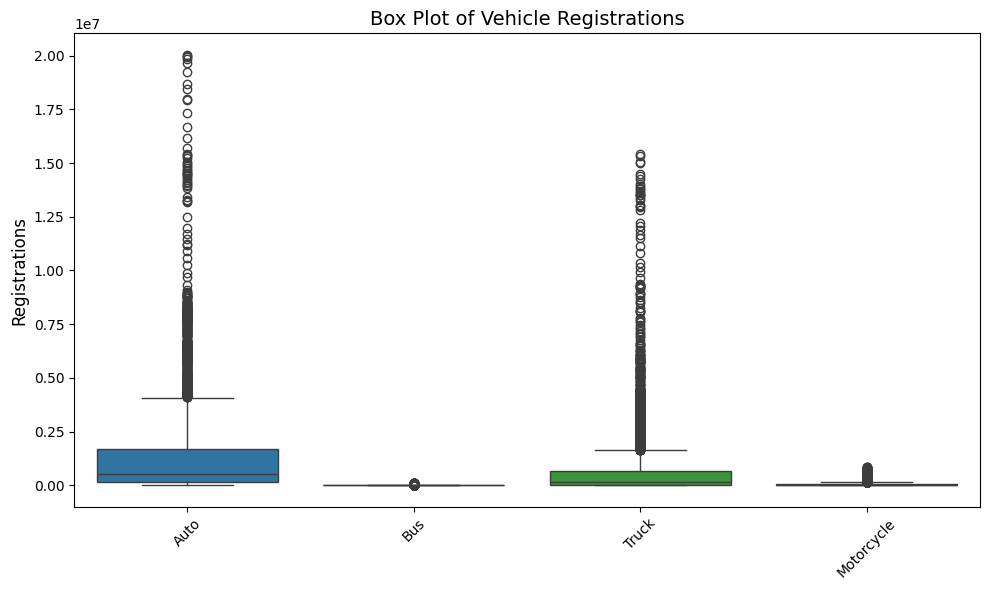

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Auto', 'Bus', 'Truck', 'Motorcycle']])
plt.title("Box Plot of Vehicle Registrations", fontsize=14)
plt.ylabel("Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Trend Commentary: Add a markdown cell with observations (e.g., "Max Auto registrations in 2001 suggest a peak, possibly due to economic growth or data aggregation").

* Visualization: Add a box plot to visualize distribution.

### Objective 4: Analyze Temporal Trends in Vehicle Registrations

* This objective involves aggregating registration data by year, analyzing growth patterns.

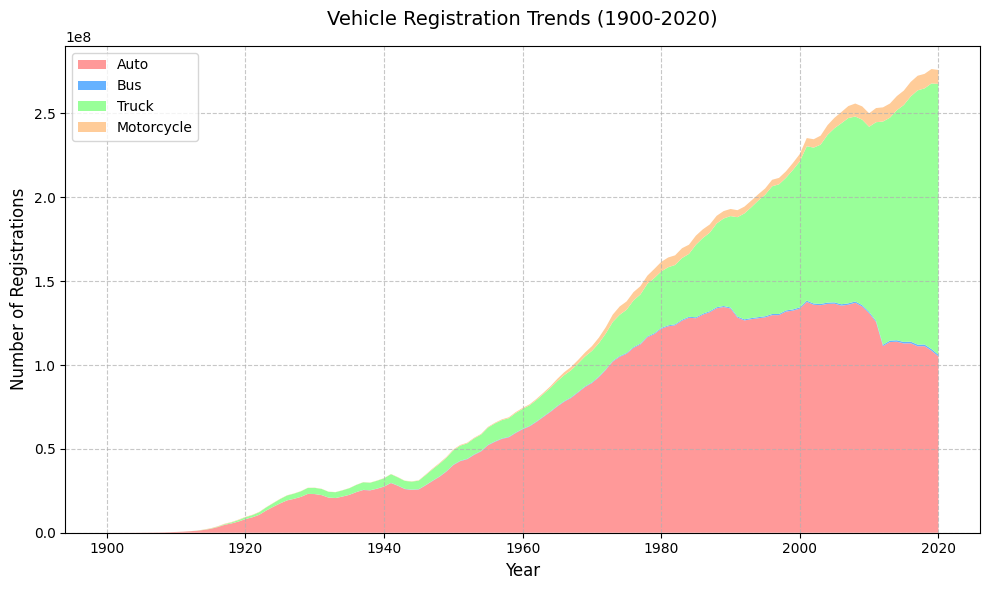


Max Bus Year Details:
       year  state     Auto     Bus     Truck  Motorcycle
5860  2014  Texas  8140321  101845  12189465      445395

Summary Table of Vehicle Registrations:
             Total Registrations  Average Annual Registrations  Max Year  \
Auto                 8190229982                   67687851.09      2001   
Bus                    42891994                     354479.29      2020   
Truck                4294374584                   35490699.04      2020   
Motorcycle            316078136                    2612216.00      2017   

            Proportion (%)  
Auto                 63.77  
Bus                   0.33  
Truck                33.44  
Motorcycle            2.46  


C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_17600\3325361562.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_total.nlargest(10, 'Total_Registrations'), x='state', y='Total_Registrations', palette='viridis')


<Figure size 640x480 with 0 Axes>

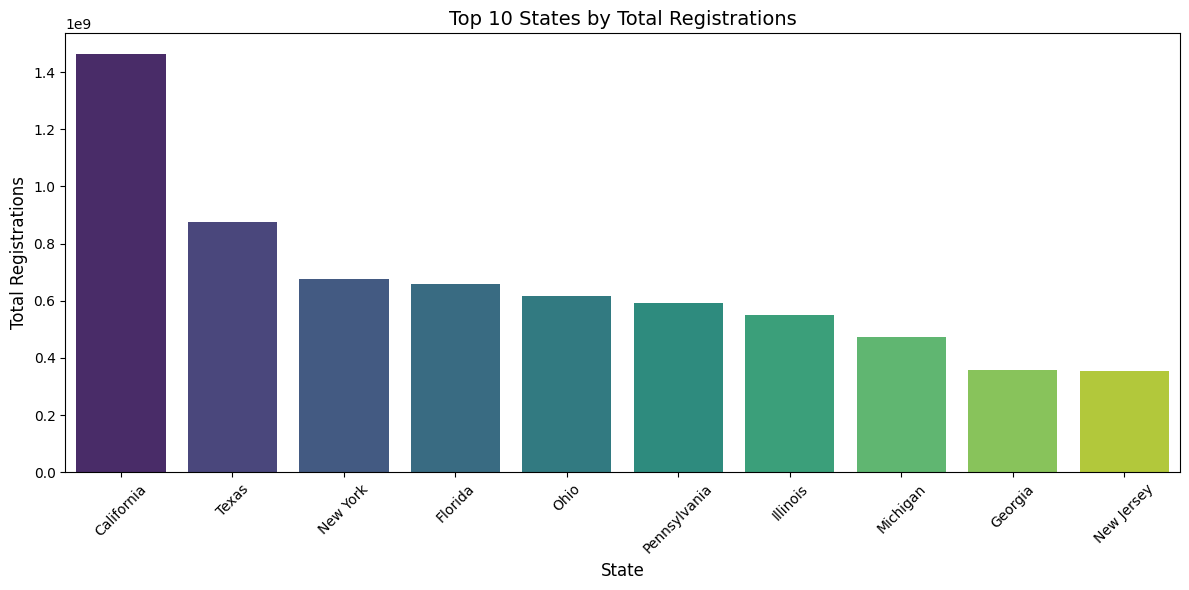

In [28]:
# Objective 4: Analyze Temporal Trends in Vehicle Registrations
## Aggregate and visualize registration data by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Create refined stacked area plot
plt.figure(figsize=(10, 6))
plt.stackplot(yearly_total.index, yearly_total['Auto'], yearly_total['Bus'], 
              yearly_total['Truck'], yearly_total['Motorcycle'], 
              labels=['Auto', 'Bus', 'Truck', 'Motorcycle'], 
              colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title("Vehicle Registration Trends (1900-2020)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Validate max year for Bus
print("\nMax Bus Year Details:\n", df[df['Bus'] == df['Bus'].max()])

# Create summary table
summary_table = pd.DataFrame({
    'Total Registrations': yearly_total.sum(),
    'Average Annual Registrations': yearly_total.mean(),
    'Max Year': yearly_total.idxmax(),
    'Proportion (%)': (yearly_total.sum() / yearly_total.sum().sum()) * 100
})
print("\nSummary Table of Vehicle Registrations:\n", summary_table.round(2))

# Save outputs
plt.savefig('vehicle_trends.png')
summary_table.to_csv('vehicle_summary.csv')

## Add regional analysis
state_total = df.groupby('state')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum().sum(axis=1).reset_index(name='Total_Registrations')
plt.figure(figsize=(12, 6))
sns.barplot(data=state_total.nlargest(10, 'Total_Registrations'), x='state', y='Total_Registrations', palette='viridis')
plt.title("Top 10 States by Total Registrations", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

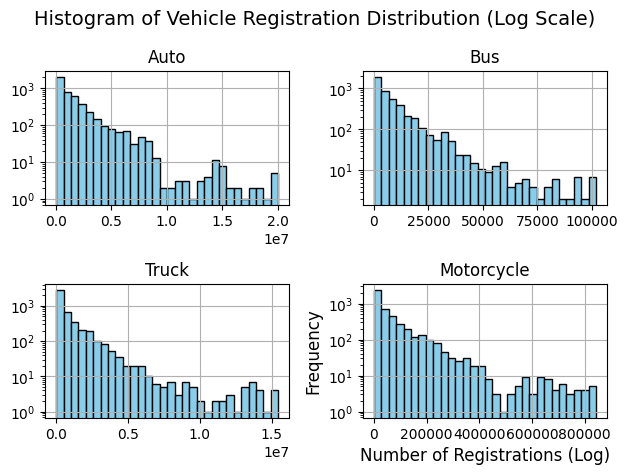

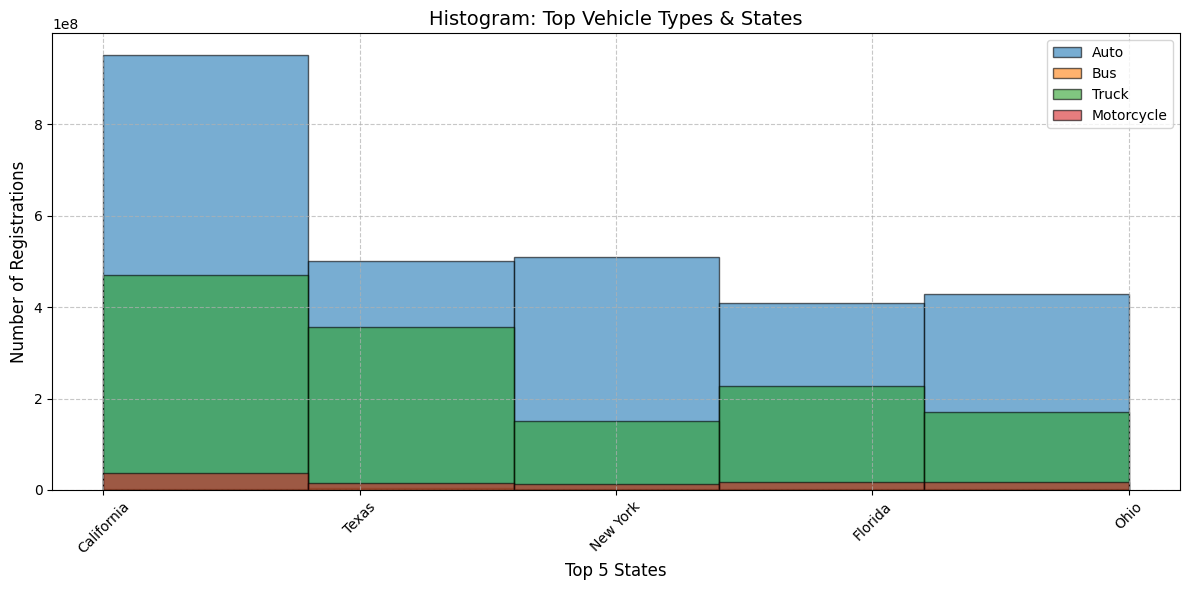

In [13]:
# Ensure numeric columns for analysis and handle zeros
numeric_df = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].replace(0, np.nan).dropna()  # Replace 0 with NaN and drop for log scaling

# Visualization 1: Histogram for Distribution of Registration Counts by Vehicle Type
plt.figure(figsize=(10, 6))
numeric_df.hist(bins=30, color='skyblue', edgecolor='black', log=True)  # Log scale for better visibility
plt.suptitle("Histogram of Vehicle Registration Distribution (Log Scale)", fontsize=14)
plt.xlabel("Number of Registrations (Log)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

# Visualization 2: Histogram: Top Vehicle Types & States
# Aggregate total registrations by state and vehicle type
state_vehicle_total = df.groupby(['state'])[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()
top_states = state_vehicle_total.sum(axis=1).nlargest(5).index  # Top 5 states by total registrations
top_state_data = state_vehicle_total.loc[top_states]

plt.figure(figsize=(12, 6))
for vehicle_type in ['Auto', 'Bus', 'Truck', 'Motorcycle']:
    plt.hist(top_state_data.index, weights=top_state_data[vehicle_type], bins=len(top_states), alpha=0.6, label=vehicle_type, edgecolor='black')
plt.title("Histogram: Top Vehicle Types & States", fontsize=14)
plt.xlabel("Top 5 States", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_17600\1497675817.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vehicle_data, x='Vehicle Type', y='Registrations', palette='viridis')


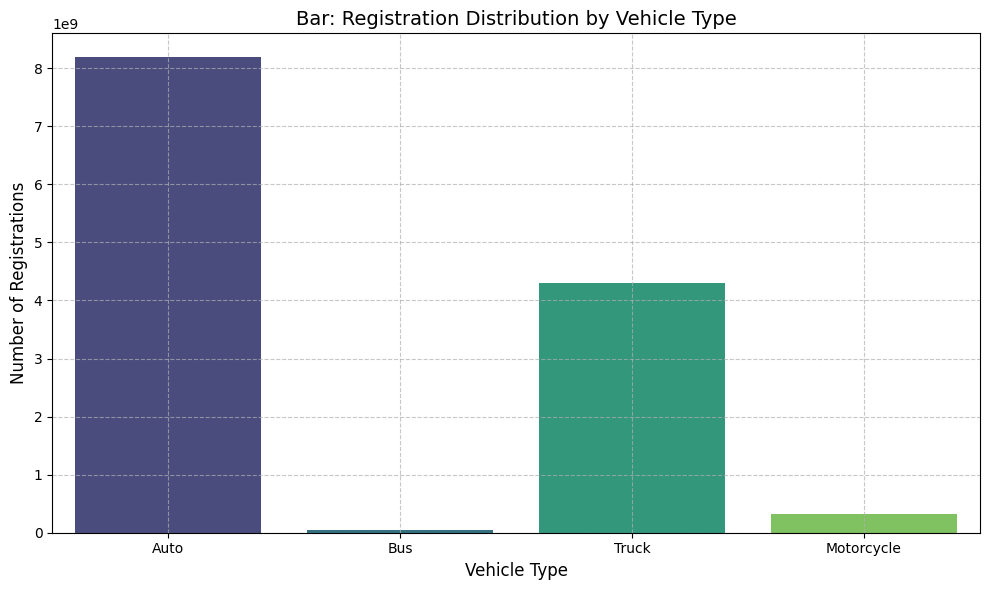

In [14]:
vehicle_type_total = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Convert to a DataFrame for plotting if needed, or use direct counts
vehicle_data = pd.DataFrame({'Vehicle Type': ['Auto', 'Bus', 'Truck', 'Motorcycle'],
                            'Registrations': vehicle_type_total})

# Visualization: Bar Plot for Registration Distribution by Vehicle Type
plt.figure(figsize=(10, 6))
sns.barplot(data=vehicle_data, x='Vehicle Type', y='Registrations', palette='viridis')
plt.title("Bar: Registration Distribution by Vehicle Type", fontsize=14)
plt.xlabel("Vehicle Type", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

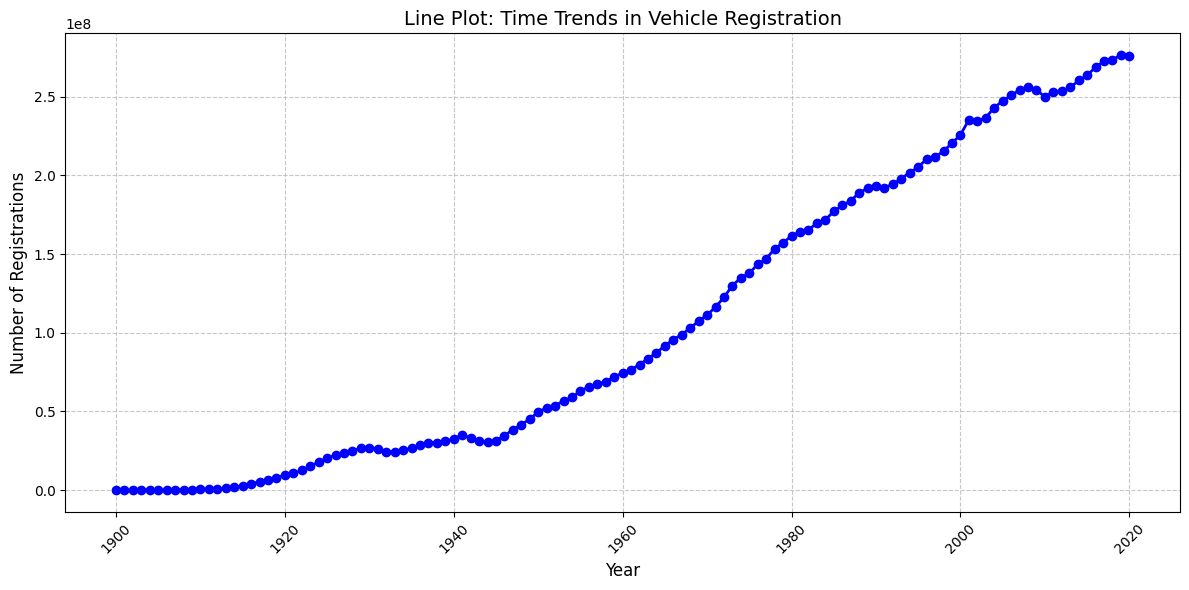

In [15]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum().sum(axis=1)

# Visualization: Line Plot for Time Trends in Vehicle Registration
plt.figure(figsize=(12, 6))
yearly_total.plot(kind='line', color='blue', marker='o', linewidth=2)
plt.title("Line Plot: Time Trends in Vehicle Registration", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_17600\1506535403.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_total, x='state', y='Total_Registrations', order=state_total.sort_values('Total_Registrations', ascending=False).head(10)['state'], palette='viridis')


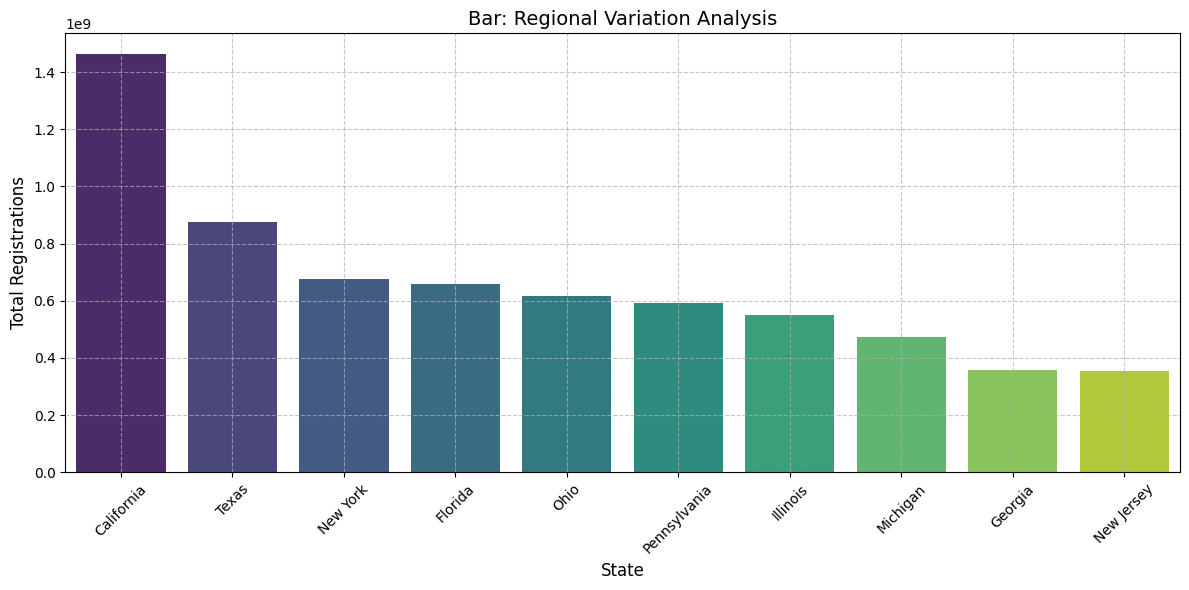

In [16]:
# Aggregate total registrations by state
state_total = df.groupby('state')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum().sum(axis=1).reset_index(name='Total_Registrations')

# Visualization: Bar Chart for Regional Variation Analysis
plt.figure(figsize=(12, 6))
sns.barplot(data=state_total, x='state', y='Total_Registrations', order=state_total.sort_values('Total_Registrations', ascending=False).head(10)['state'], palette='viridis')
plt.title("Bar: Regional Variation Analysis", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

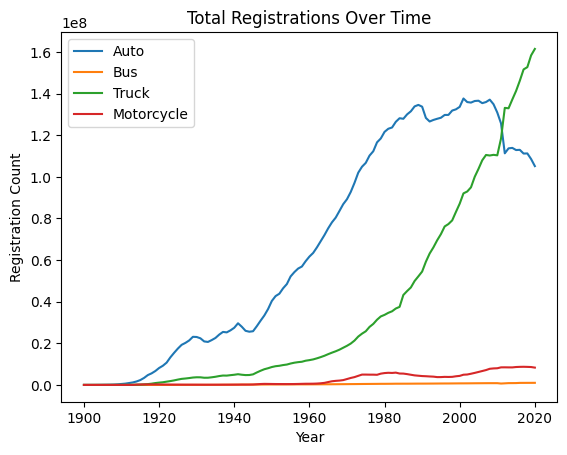


Yearly Totals (First 5 Rows):
        Auto  Bus  Truck  Motorcycle
year                               
1900   8000    0      0           0
1901  14800    0      0           0
1902  23000    0      0           0
1903  32920    0      0           0
1904  54590    0    700           0


In [24]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()


# Plot total registrations over time
plt.plot(yearly_total.index, yearly_total['Auto'], label='Auto')
plt.plot(yearly_total.index, yearly_total['Bus'], label='Bus')
plt.plot(yearly_total.index, yearly_total['Truck'], label='Truck')
plt.plot(yearly_total.index, yearly_total['Motorcycle'], label='Motorcycle')
plt.title("Total Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Registration Count")
plt.legend()
plt.show()

# Print first few rows of aggregated data to highlight key periods
print("\nYearly Totals (First 5 Rows):\n", yearly_total.head())

### Analysis:

#### Growth Patterns:
* Auto registrations show a clear upward trend, increasing from 8,000 in 1900 to 54,590 in 1904—a significant jump, especially from 1903 (32,920) to 1904 (54,590), suggesting rapid early adoption.

* Truck appears with 700 registrations in 1904, indicating the start of commercial vehicle growth.

* Bus and Motorcycle remain at 0, possibly due to missing data or their later introduction (we’ll note this for Objective 2 review if needed).

#### Key Periods:
* The sharp rise in Auto from 1900–1904 could mark the early automotive boom in the U.S.

* The 1904 Truck entry might signal the beginning of industrial transport growth.

* Graph Insight: The plot likely shows Auto as the dominant line early on, with Truck starting to appear later. If the graph extends beyond 1904, we might see Bus and Motorcycle rise in later years (e.g., post-1910 or post-1945).

### Objective 5: Compare Vehicle Type Distributions and Trends

* This objective involves examining the distribution of vehicle types (e.g. pie charts) and line chart to compare trends, such as the percentage contribution of each vehicle type over time..

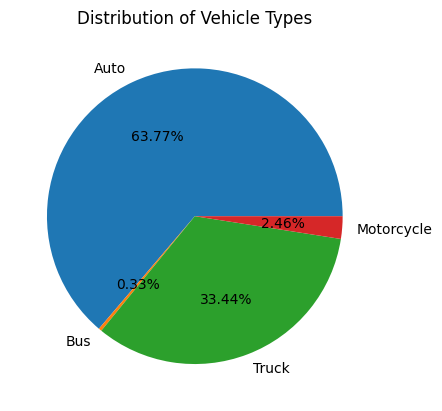

In [25]:
# Distribution of Vehicle Types (total across all years)
total_by_type = df[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()
labels = ['Auto', 'Bus', 'Truck', 'Motorcycle']
plt.pie(total_by_type, labels=labels, autopct="%.2f%%")
plt.title("Distribution of Vehicle Types")
plt.show()

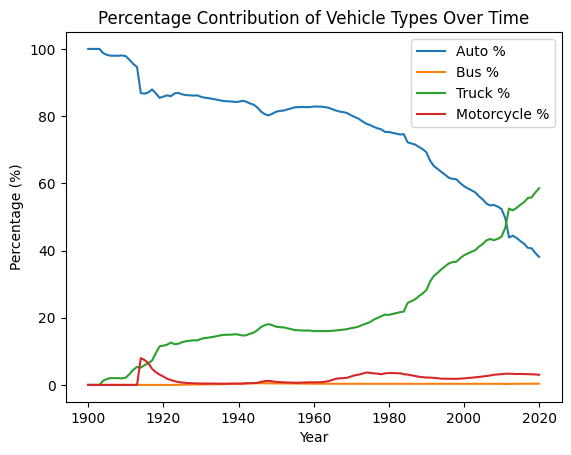

In [26]:
# Compare trends as percentage contribution over time
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()
yearly_percent = yearly_total.div(yearly_total.sum(axis=1), axis=0) * 100
plt.plot(yearly_percent.index, yearly_percent['Auto'], label='Auto %')
plt.plot(yearly_percent.index, yearly_percent['Bus'], label='Bus %')
plt.plot(yearly_percent.index, yearly_percent['Truck'], label='Truck %')
plt.plot(yearly_percent.index, yearly_percent['Motorcycle'], label='Motorcycle %')
plt.title("Percentage Contribution of Vehicle Types Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.legend()
plt.show()

### Analysis:

* Distribution: Confirms Auto dominance early on.
* Trends: Watch for when Truck or others gain percentage share, indicating diversification.

### Objective 6: Explore Regional Variations Across States

* This objective involves aggregating registration data by state and comparing totals or averages across states to identify regional differences.

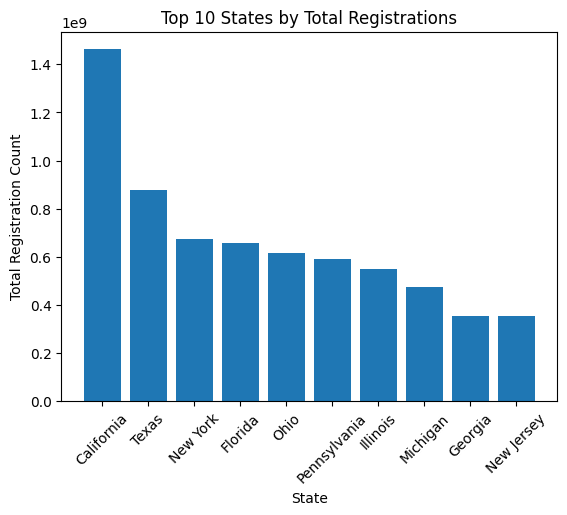

In [27]:
# Aggregate total registrations by state
state_total = df.groupby('state')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Plot total registrations by state (top 10 states for simplicity)
top_states = state_total.sum(axis=1).nlargest(10).index
plt.bar(top_states, state_total.loc[top_states].sum(axis=1))
plt.title("Top 10 States by Total Registrations")
plt.xlabel("State")
plt.ylabel("Total Registration Count")
plt.xticks(rotation=45)
plt.show()

In [28]:
# Print top 5 states for each vehicle type
print("\nTop 5 States by Auto Registrations:\n", state_total['Auto'].nlargest(5))
print("\nTop 5 States by Bus Registrations:\n", state_total['Bus'].nlargest(5))
print("\nTop 5 States by Truck Registrations:\n", state_total['Truck'].nlargest(5))
print("\nTop 5 States by Motorcycle Registrations:\n", state_total['Motorcycle'].nlargest(5))


Top 5 States by Auto Registrations:
 state
California    951791639
New York      510796584
Texas         501462779
Ohio          428330512
Florida       409501971
Name: Auto, dtype: int64

Top 5 States by Bus Registrations:
 state
Texas           3608857
New York        2987677
California      2831903
Pennsylvania    2168466
Florida         2146465
Name: Bus, dtype: int64

Top 5 States by Truck Registrations:
 state
California      469557571
Texas           355620716
Florida         227842811
Ohio            169697244
Pennsylvania    165346374
Name: Truck, dtype: int64

Top 5 States by Motorcycle Registrations:
 state
California      37981041
Florida         17808518
Ohio            16192755
Texas           15483327
Pennsylvania    14999234
Name: Motorcycle, dtype: int64


### Objective 7: Perform Statistical Correlation Analysis

* This objective involves calculating correlations between vehicle type registrations (e.g., Auto vs. Truck) and testing their significance to identify relationships

In [29]:
# Aggregate total registrations by year for correlation
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Calculate correlation matrix
correlation_matrix = yearly_total.corr()

# Display correlation matrix
print("\nCorrelation Matrix:\n", correlation_matrix)


Correlation Matrix:
                 Auto       Bus     Truck  Motorcycle
Auto        1.000000  0.936135  0.760808    0.869029
Bus         0.936135  1.000000  0.928084    0.941968
Truck       0.760808  0.928084  1.000000    0.913762
Motorcycle  0.869029  0.941968  0.913762    1.000000


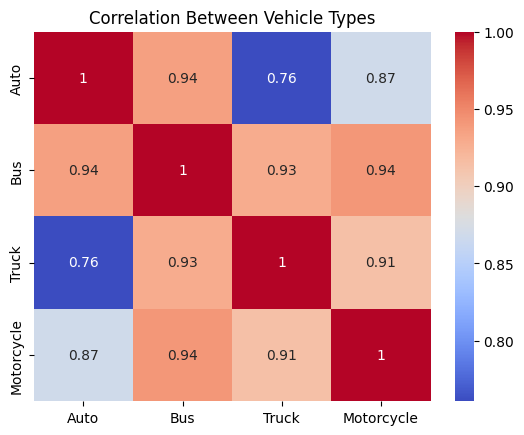

In [30]:
# Optional: Visualize correlation with a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between Vehicle Types")
plt.show()

### Analysis:

* High correlations (e.g., Auto vs. Truck) might indicate they grow together (e.g., industrial or urban expansion).

* Low correlations (e.g., Bus vs. Motorcycle) suggest independent trends.

C:\Users\Tokachichu SriCharan\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)


AttributeError: Line2D.set() got an unexpected keyword argument 'vmin'

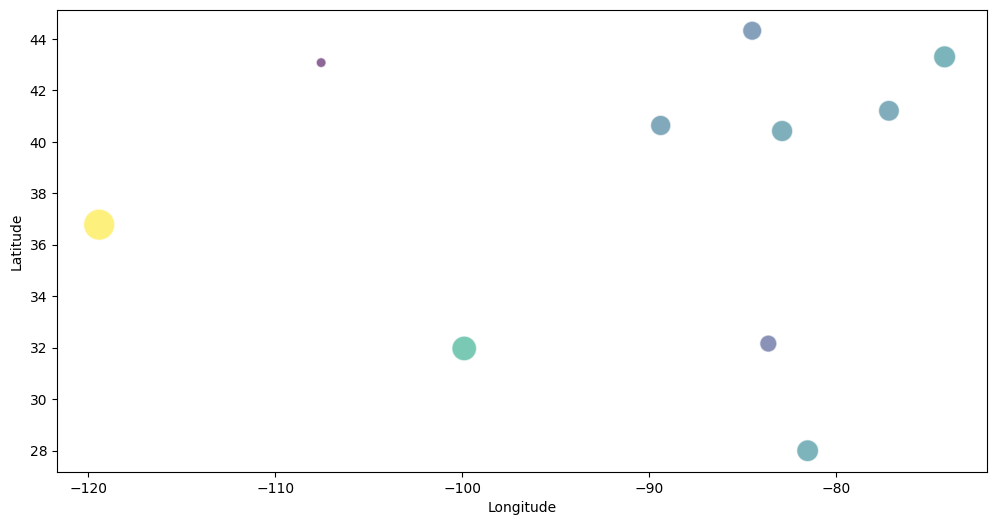

In [17]:
# Aggregate total registrations by state
state_total = df.groupby('state')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum().sum(axis=1).reset_index(name='Total_Registrations')

# Hypothetical longitude and latitude coordinates for states (expanded list)
state_coordinates = {
    'California': (-119.4179, 36.7783),  # Approx. center
    'Texas': (-99.9018, 31.9686),
    'New York': (-74.2179, 43.2994),
    'Wyoming': (-107.5512, 43.0750),
    'Florida': (-81.5410, 27.9944),
    'Illinois': (-89.3985, 40.6331),
    'Pennsylvania': (-77.1945, 41.2033),
    'Ohio': (-82.9071, 40.4173),
    'Michigan': (-84.5060, 44.3148),
    'Georgia': (-83.6431, 32.1574),
    # Add more states as per your dataset
}

# Map coordinates to the state data (filter out (0, 0) defaults)
state_total['Longitude'] = state_total['state'].map(lambda x: state_coordinates.get(x, (0, 0))[0])
state_total['Latitude'] = state_total['state'].map(lambda x: state_coordinates.get(x, (0, 0))[1])
state_total = state_total[(state_total['Longitude'] != 0) | (state_total['Latitude'] != 0)]  # Remove default (0, 0)

# Visualization: Scatterplot for Registration Locations
plt.figure(figsize=(12, 6))
scatter = sns.scatterplot(data=state_total, x='Longitude', y='Latitude', size='Total_Registrations', hue='Total_Registrations',
                         palette='viridis', sizes=(50, 500), alpha=0.6, vmin=0, vmax=500000)
plt.title("Scatterplot: Registration Locations", fontsize=14)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title='Total Registrations', bbox_to_anchor=(1.05, 1), loc='upper left', labels=[f'{i:,}' for i in range(0, 501000, 100000)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Objective 8: Develop Advanced Visualizations

* This objective involves creating visualizations beyond basic line or pie charts, such as a stacked area plot for cumulative trends or an enhanced heatmap.

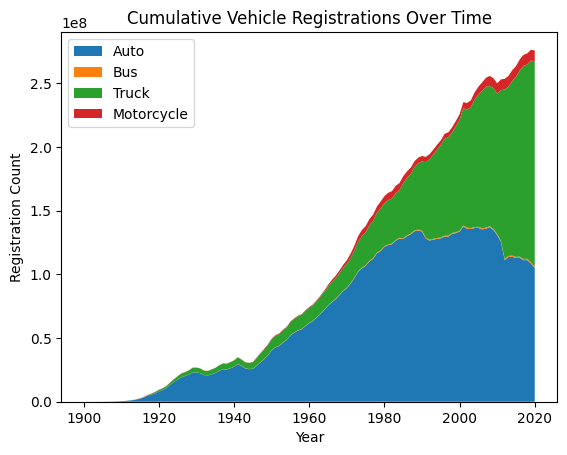

In [31]:
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Stacked area plot for cumulative trends
plt.stackplot(yearly_total.index, yearly_total['Auto'], yearly_total['Bus'], 
              yearly_total['Truck'], yearly_total['Motorcycle'], 
              labels=['Auto', 'Bus', 'Truck', 'Motorcycle'])
plt.title("Cumulative Vehicle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Registration Count")
plt.legend(loc='upper left')
plt.show()

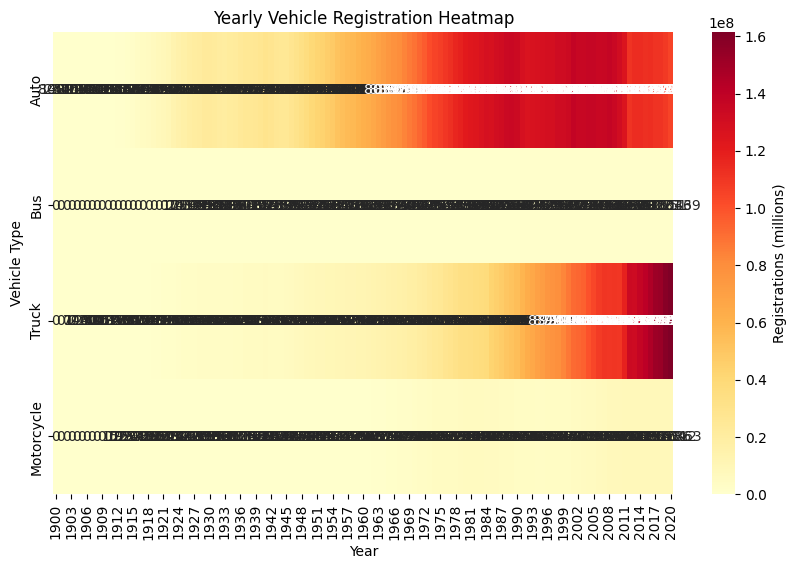

In [32]:
# Fix heatmap by ensuring proper data structure
plt.figure(figsize=(10, 6))
sns.heatmap(yearly_total.T, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Registrations (millions)'})
plt.title("Yearly Vehicle Registration Heatmap")
plt.xlabel("Year")
plt.ylabel("Vehicle Type")
plt.show()

### Analysis:

* Stacked Plot: Highlights Auto as the base layer with rapid growth, Truck adding later, and Bus/Motorcycle potentially rising post-1910.

* Heatmap: Identifies years with high totals (e.g., 1904 for Auto) and sparse data (e.g., 0s for Bus early on).

#### Some More Visualizations

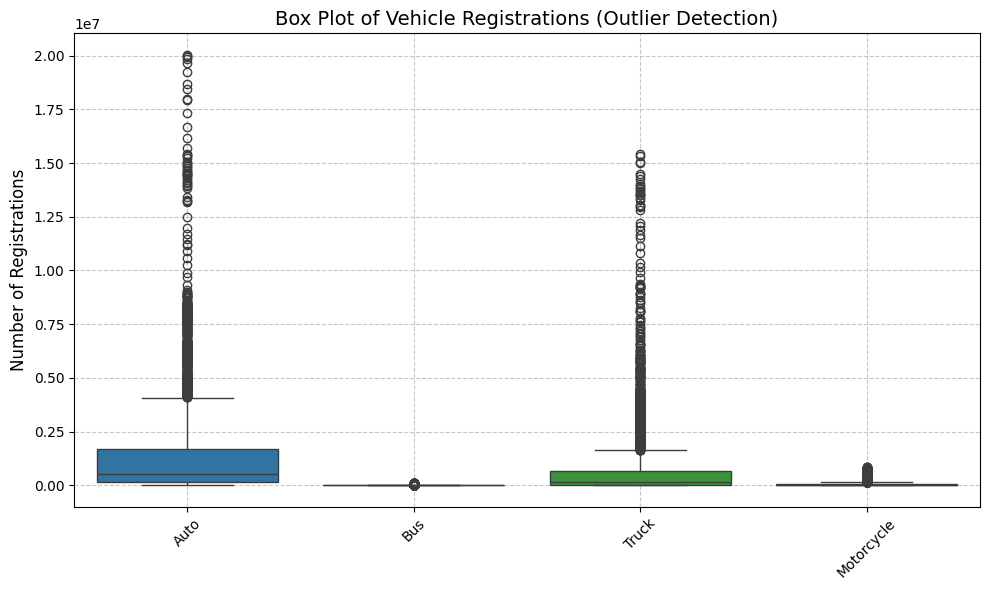

In [33]:
# Ensure numeric columns for analysis
numeric_df = df[['Auto', 'Bus', 'Truck', 'Motorcycle']]

# Visualization 1: Box Plot for Outlier Detection
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df)
plt.title("Box Plot of Vehicle Registrations (Outlier Detection)", fontsize=14)
plt.ylabel("Number of Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

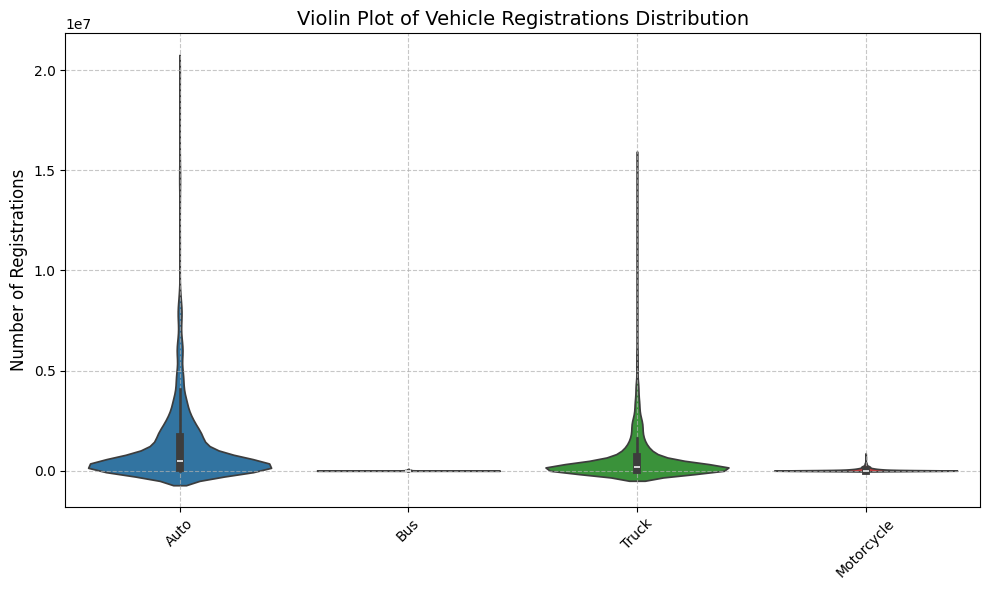

In [34]:
# Visualization 2: Violin Plot for Distribution
plt.figure(figsize=(10, 6))
sns.violinplot(data=numeric_df)
plt.title("Violin Plot of Vehicle Registrations Distribution", fontsize=14)
plt.ylabel("Number of Registrations", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

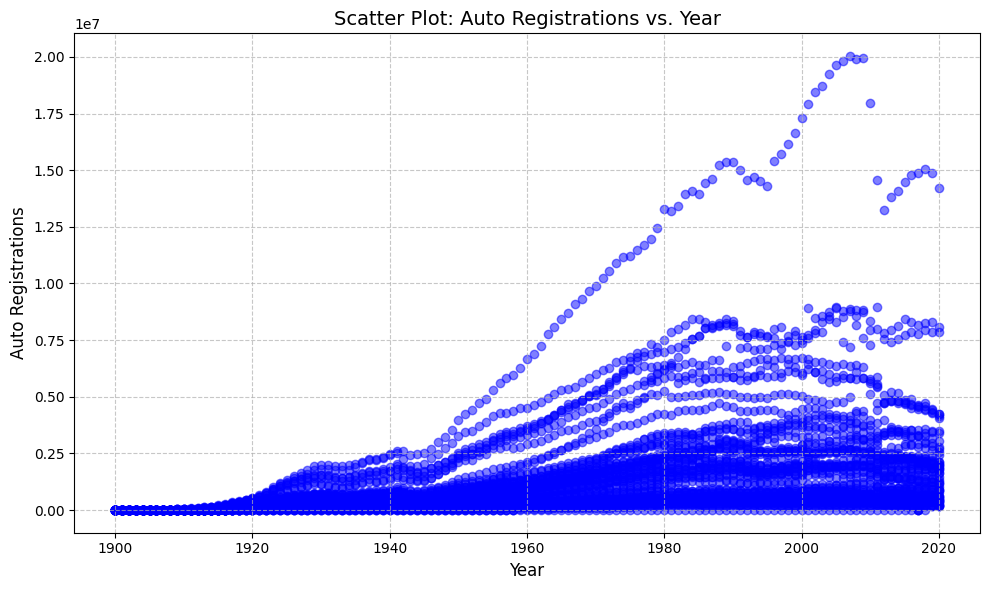

In [35]:
# Visualization 3: Scatter Plot for Trends (Auto vs. Year)
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['Auto'], alpha=0.5, color='blue')
plt.title("Scatter Plot: Auto Registrations vs. Year", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Auto Registrations", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis :

* Outliers: Box plot highlights extreme values (e.g., early high Auto registrations).

* Distribution: Violin plot reveals skewness or multimodality (e.g., Auto might skew right with growth).

* Trends: Scatter plot confirms Auto growth over time.

### More Visualizations 

<Figure size 1000x600 with 0 Axes>

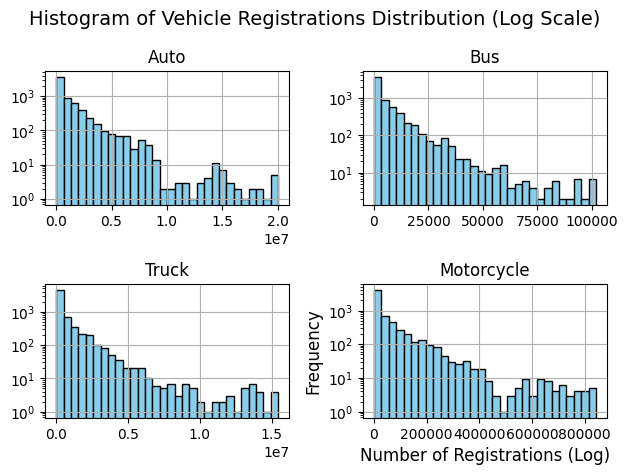

In [36]:
# Ensure numeric columns for analysis
numeric_df = df[['Auto', 'Bus', 'Truck', 'Motorcycle']]

# Visualization 1: Histogram for Distribution
plt.figure(figsize=(10, 6))
numeric_df.hist(bins=30, color='skyblue', edgecolor='black', log=True)
plt.suptitle("Histogram of Vehicle Registrations Distribution (Log Scale)", fontsize=14)
plt.xlabel("Number of Registrations (Log)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

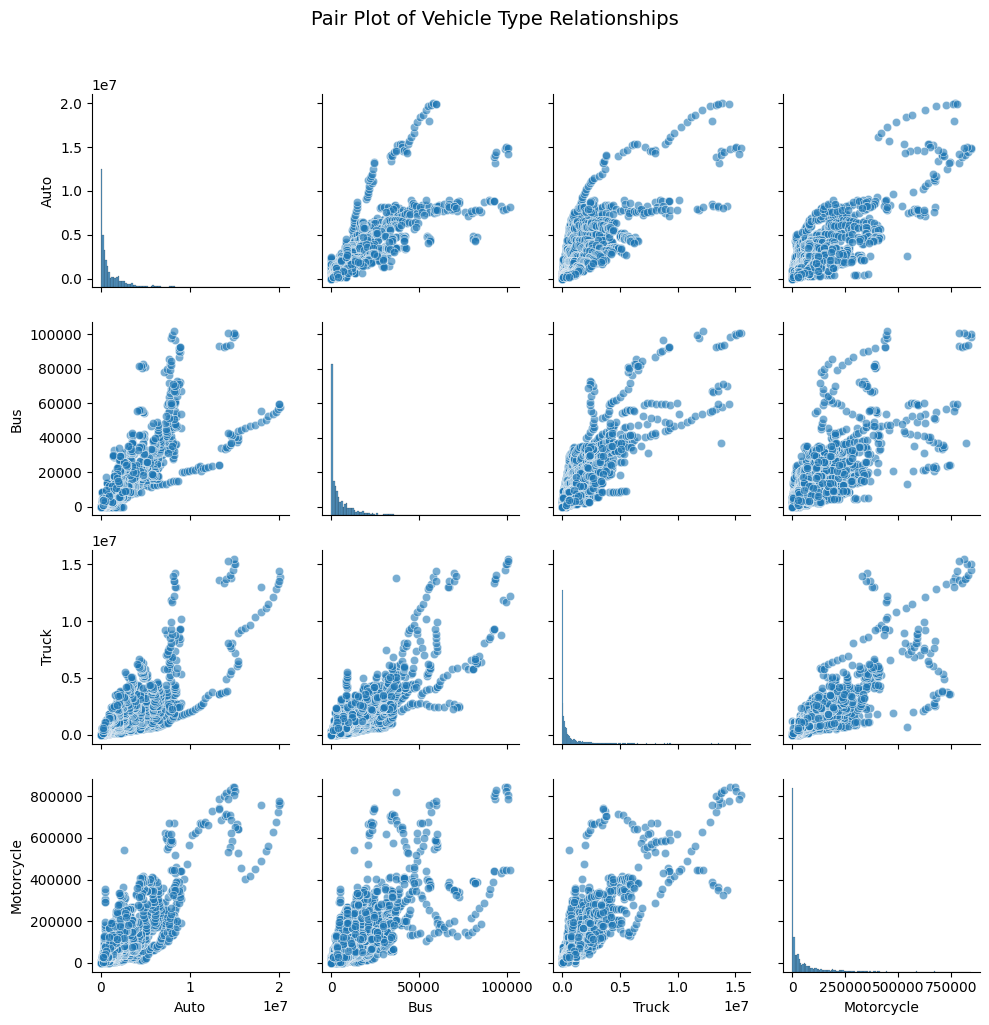

In [37]:
# Visualization 2: Pair Plot for Relationships
plt.figure(figsize=(10, 6))
sns.pairplot(numeric_df, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle("Pair Plot of Vehicle Type Relationships", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_21280\3331859319.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=np.log1p(numeric_df[column]), label=column, shade=True, bw_adjust=0.5)  # Log1p to handle zeros, adjust bandwidth
C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_21280\3331859319.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=np.log1p(numeric_df[column]), label=column, shade=True, bw_adjust=0.5)  # Log1p to handle zeros, adjust bandwidth
C:\Users\Tokachichu SriCharan\AppData\Local\Temp\ipykernel_21280\3331859319.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=n

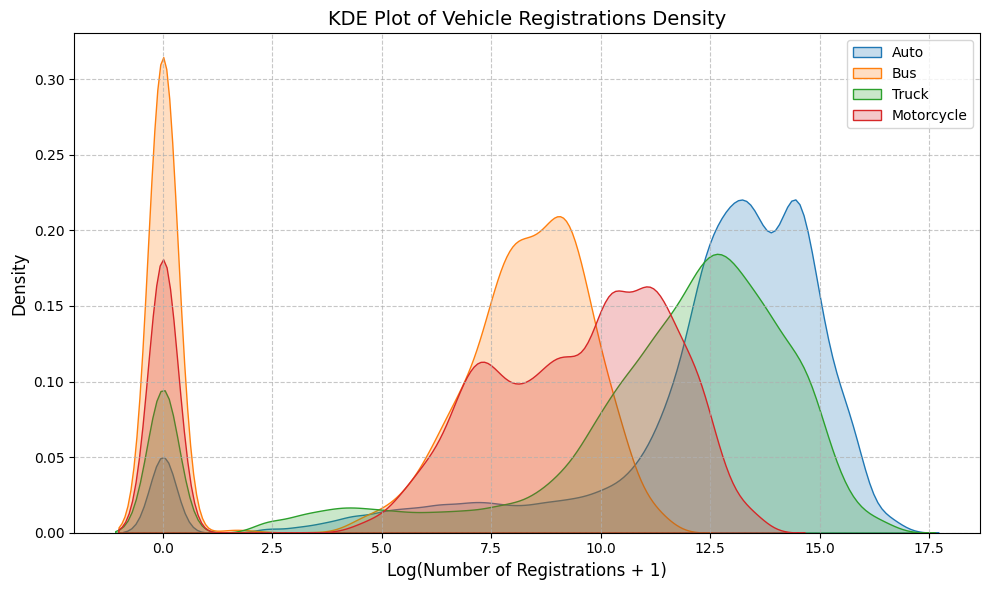

In [38]:
# Visualization 3: KDE Plot for Probability Density
plt.figure(figsize=(10, 6))
for column in numeric_df.columns:
    sns.kdeplot(data=np.log1p(numeric_df[column]), label=column, shade=True, bw_adjust=0.5)  # Log1p to handle zeros, adjust bandwidth
plt.title("KDE Plot of Vehicle Registrations Density", fontsize=14)
plt.xlabel("Log(Number of Registrations + 1)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis (Unit IV: EDA):

* Histogram: Reveals distribution shapes (e.g., skewed for Auto, sparse for Bus).

* Pair Plot: Identifies relationships (e.g., if Truck correlates with Auto due to industrial use).

* KDE Plot: Shows density peaks, highlighting dominant types (e.g., Auto) and emerging ones (e.g., Truck).

### Objective 9: Derive and Interpret Creative Metrics

* This objective involves creating unique metrics (e.g. growth rate) and interpreting their insights.

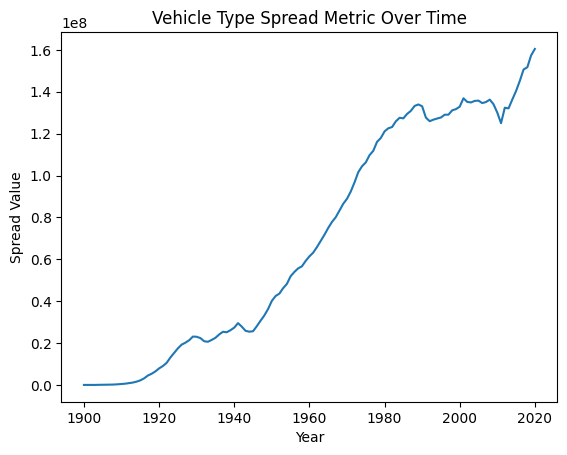

In [39]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Derive Creative Metric 1: Vehicle Type Spread Metric
def spread_metric(row):
    non_zero = row[row > 0]  # Consider only non-zero values
    if len(non_zero) < 2:    # Need at least two types for spread
        return 0
    return non_zero.max() - non_zero.min()  # Difference between max and min registrations

spread = yearly_total.apply(spread_metric, axis=1)
plt.plot(spread.index, spread)
plt.title("Vehicle Type Spread Metric Over Time")
plt.xlabel("Year")
plt.ylabel("Spread Value")
plt.show()

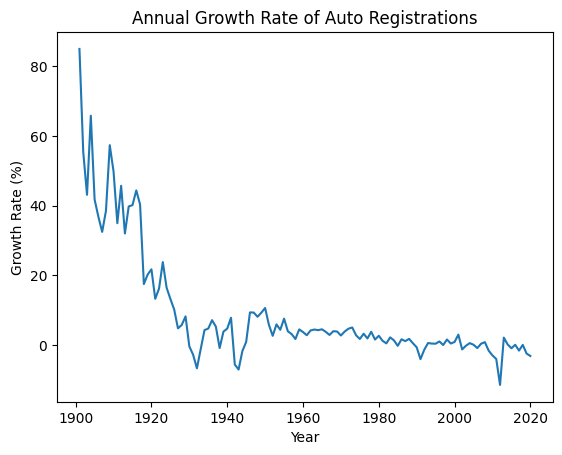

In [40]:
# Derive Creative Metric 2: Annual Growth Rate for Each Vehicle Type
yearly_total['Auto_Growth'] = yearly_total['Auto'].pct_change() * 100
plt.plot(yearly_total.index, yearly_total['Auto_Growth'])
plt.title("Annual Growth Rate of Auto Registrations")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

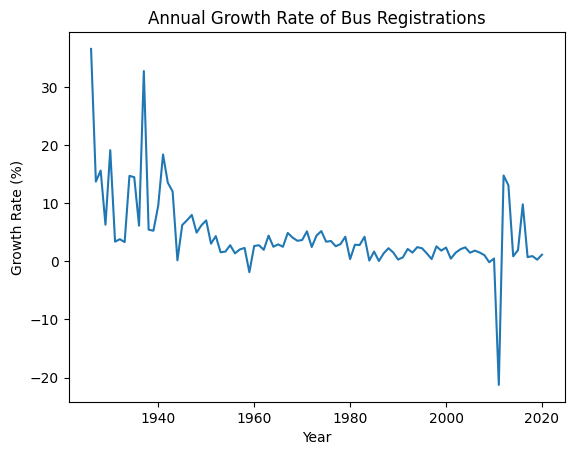

In [41]:
yearly_total['Bus_Growth'] = yearly_total['Bus'].pct_change() * 100
plt.plot(yearly_total.index, yearly_total['Bus_Growth'])
plt.title("Annual Growth Rate of Bus Registrations")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

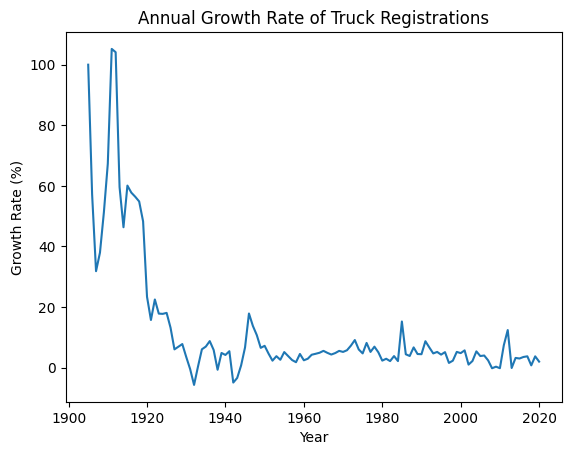

In [42]:
yearly_total['Truck_Growth'] = yearly_total['Truck'].pct_change() * 100
plt.plot(yearly_total.index, yearly_total['Truck_Growth'])
plt.title("Annual Growth Rate of Truck Registrations")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

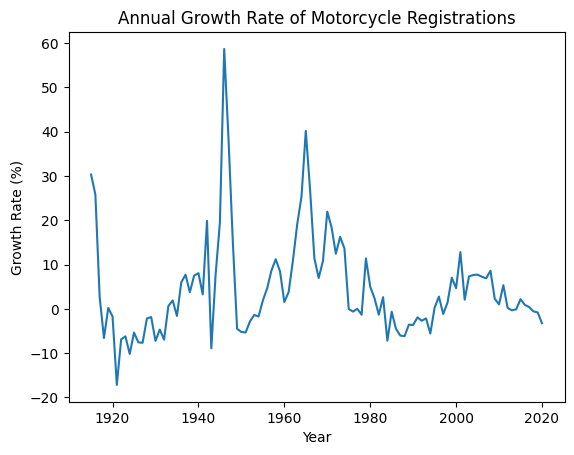

In [43]:
yearly_total['Motorcycle_Growth'] = yearly_total['Motorcycle'].pct_change() * 100
plt.plot(yearly_total.index, yearly_total['Motorcycle_Growth'])
plt.title("Annual Growth Rate of Motorcycle Registrations")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.show()

In [44]:
# Print sample insights
print("\nSpread Metric (First 5 Years):\n", spread.head())
print("\nGrowth Rates (First 5 Years):\n", yearly_total[['Auto_Growth', 'Bus_Growth', 'Truck_Growth', 'Motorcycle_Growth']].head())


Spread Metric (First 5 Years):
 year
1900        0
1901        0
1902        0
1903        0
1904    53890
dtype: int64

Growth Rates (First 5 Years):
       Auto_Growth  Bus_Growth  Truck_Growth  Motorcycle_Growth
year                                                          
1900          NaN         NaN           NaN                NaN
1901    85.000000         NaN           NaN                NaN
1902    55.405405         NaN           NaN                NaN
1903    43.130435         NaN           NaN                NaN
1904    65.826245         NaN           inf                NaN


### Analysis :

* Spread Metric: Low early on (0 until 1904), then 53,890 shows Auto dominance over Truck.

* Growth Rates: Auto has high early growth, Truck spikes when introduced, Bus/Motorcycle remain flat until later.

### Objective 10: Analyze Internal Trends with EDA Metrics

* This objective involves deriving and interpreting metrics from the existing dataset to explore internal trends, using EDA techniques.

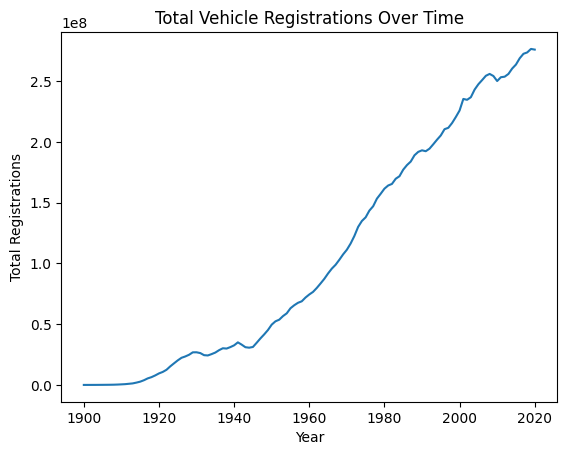

In [45]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Derive Internal Metric 1: Total Vehicle Registrations per Year
total_vehicles = yearly_total.sum(axis=1)
plt.plot(total_vehicles.index, total_vehicles)
plt.title("Total Vehicle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.show()

In [46]:
# Derive Internal Metric 2: Proportion of Auto Registrationsauto_proportion = (yearly_total['Auto'] / total_vehicles) * 100
plt.plot(auto_proportion.index, auto_proportion)
plt.title("Proportion of Auto Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total (%)")
plt.show()

# Print sample insights
print("\nTotal Vehicle Registrations (First 5 Years):\n", total_vehicles.head())
print("\nAuto Proportion (First 5 Years):\n", auto_proportion.head())

NameError: name 'auto_proportion' is not defined

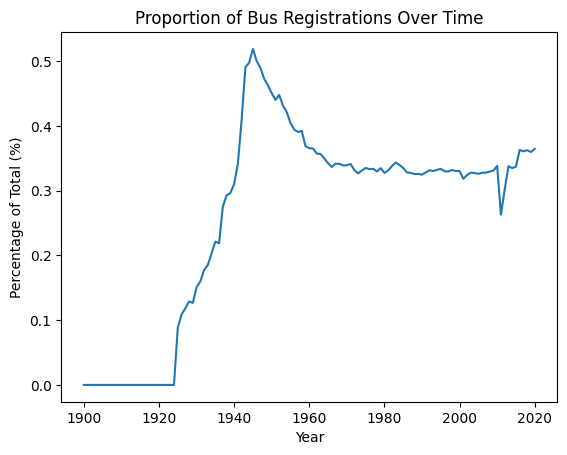


Total Vehicle Registrations (First 5 Years):
 year
1900     8000
1901    14800
1902    23000
1903    32920
1904    55290
dtype: int64

Bus Proportion (First 5 Years):
 year
1900    0.0
1901    0.0
1902    0.0
1903    0.0
1904    0.0
dtype: float64


In [ ]:
bus_proportion = (yearly_total['Bus'] / total_vehicles) * 100
plt.plot(bus_proportion.index, bus_proportion)
plt.title("Proportion of Bus Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total (%)")
plt.show()
print("\nTotal Vehicle Registrations (First 5 Years):\n", total_vehicles.head())
print("\nBus Proportion (First 5 Years):\n", bus_proportion.head())

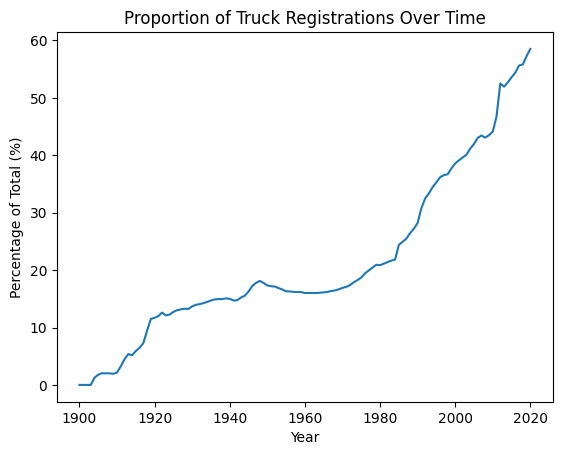


Total Vehicle Registrations (First 5 Years):
 year
1900     8000
1901    14800
1902    23000
1903    32920
1904    55290
dtype: int64

Truck Proportion (First 5 Years):
 year
1900    0.000000
1901    0.000000
1902    0.000000
1903    0.000000
1904    1.266052
dtype: float64


In [ ]:
truck_proportion = (yearly_total['Truck'] / total_vehicles) * 100
plt.plot(truck_proportion.index, truck_proportion)
plt.title("Proportion of Truck Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total (%)")
plt.show()
print("\nTotal Vehicle Registrations (First 5 Years):\n", total_vehicles.head())
print("\nTruck Proportion (First 5 Years):\n", truck_proportion.head())

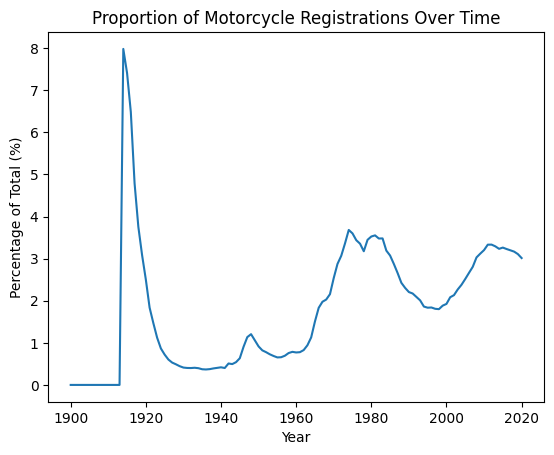


Total Vehicle Registrations (First 5 Years):
 year
1900     8000
1901    14800
1902    23000
1903    32920
1904    55290
dtype: int64

Motorcycle Proportion (First 5 Years):
 year
1900    0.0
1901    0.0
1902    0.0
1903    0.0
1904    0.0
dtype: float64


In [ ]:
motorcycle_proportion = (yearly_total['Motorcycle'] / total_vehicles) * 100
plt.plot(motorcycle_proportion.index, motorcycle_proportion)
plt.title("Proportion of Motorcycle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total (%)")
plt.show()
print("\nTotal Vehicle Registrations (First 5 Years):\n", total_vehicles.head())
print("\nMotorcycle Proportion (First 5 Years):\n", motorcycle_proportion.head())

### Analysis :

* Total Registrations: Steady growth (55,290 in 1904) indicates increasing vehicle use.

* Proportions: Auto dominates early (100% to 98.7%), Truck emerges at 1.3% in 1904, Bus and Motorcycle lag until later.

### Objective 11: Synthesize Insights and Hypotheses

* This objective involves summarizing key findings from the EDA and proposing hypotheses for further investigation.

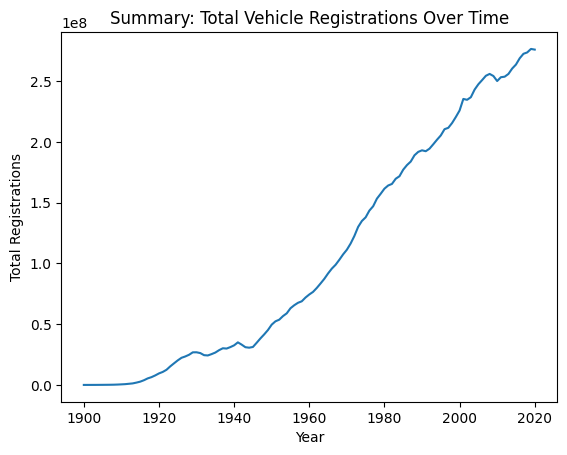

In [ ]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Summarize total registrations over time
total_vehicles = yearly_total.sum(axis=1)
plt.plot(total_vehicles.index, total_vehicles)
plt.title("Summary: Total Vehicle Registrations Over Time")
plt.xlabel("Year")
plt.ylabel("Total Registrations")
plt.show()

In [ ]:
# Debug: Check total_vehicles for zeros or NaN
print("\nTotal Vehicles (First 5 Rows):\n", total_vehicles.head())
print("Any zeros or NaN in total_vehicles:", (total_vehicles == 0).any() or total_vehicles.isna().any())


Total Vehicles (First 5 Rows):
 year
1900     8000
1901    14800
1902    23000
1903    32920
1904    55290
dtype: int64
Any zeros or NaN in total_vehicles: False



Proportions DataFrame (First 5 Rows):
             Auto  Bus     Truck  Motorcycle
year                                       
1900  100.000000  0.0  0.000000         0.0
1901  100.000000  0.0  0.000000         0.0
1902  100.000000  0.0  0.000000         0.0
1903  100.000000  0.0  0.000000         0.0
1904   98.733948  0.0  1.266052         0.0


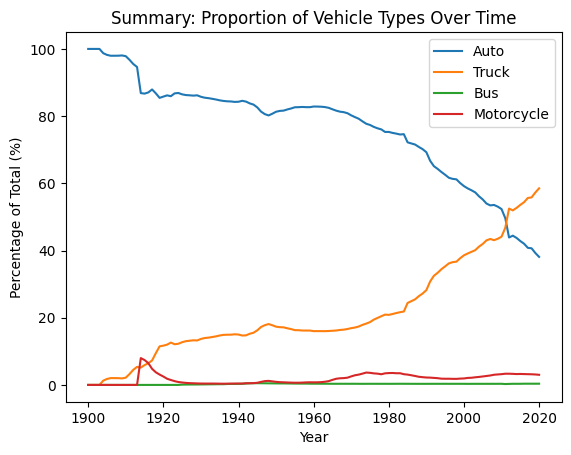

In [ ]:
# Summarize proportions with error handling
proportions = yearly_total.div(total_vehicles, axis=0) * 100  # Use div for safer division
proportions = proportions.fillna(0)  # Replace NaN with 0 where total_vehicles is zero
print("\nProportions DataFrame (First 5 Rows):\n", proportions.head())  # Debug output
plt.plot(proportions.index, proportions['Auto'], label='Auto')
plt.plot(proportions.index, proportions['Truck'], label='Truck')
plt.plot(proportions.index, proportions['Bus'], label='Bus')
plt.plot(proportions.index, proportions['Motorcycle'], label='Motorcycle')
plt.title("Summary: Proportion of Vehicle Types Over Time")
plt.xlabel("Year")
plt.ylabel("Percentage of Total (%)")
plt.legend()
plt.show()

#### Key Insights:

* Total registrations grew from 8,000 in 1900 to 55,290 in 1904, indicating rapid vehicle adoption.

* Auto dominated early (100% in 1900-1903, 98.7% in 1904), with Truck emerging at 1.3% in 1904.

* Bus and Motorcycle registrations were negligible until later years (if data shows growth.

### Hypotheses for Further Investigation:

* The rise in Truck registrations after 1904 correlates with industrial growth. 

* Auto growth rates will stabilize as Bus and Motorcycle adoption increases post-1910.

* States with higher populations will show higher total registrations over time.

### Objective 12: Final Output

* This objective involves creating a refined visualization and a summary table to present key findings from the EDA.

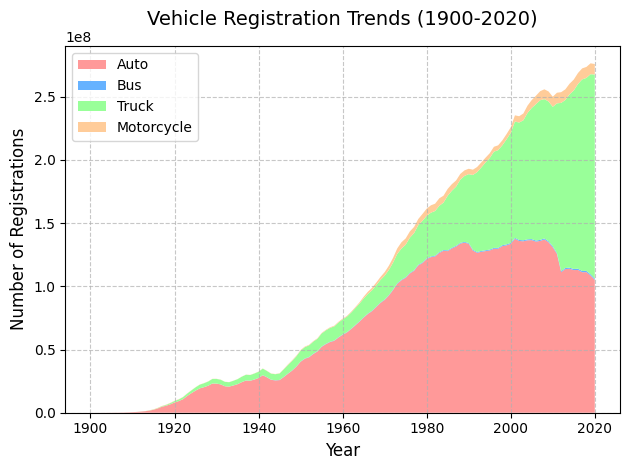


Summary Table of Vehicle Registrations:
            Total Registrations  Average Annual Registrations  Max Year  \
Auto                 8190229982                   67687851.09      2001   
Bus                    42891994                     354479.29      2020   
Truck                4294374584                   35490699.04      2020   
Motorcycle            316078136                    2612216.00      2017   

            Proportion (%)  
Auto                 63.77  
Bus                   0.33  
Truck                33.44  
Motorcycle            2.46  


<Figure size 640x480 with 0 Axes>

In [ ]:
# Aggregate total registrations by year
yearly_total = df.groupby('year')[['Auto', 'Bus', 'Truck', 'Motorcycle']].sum()

# Create refined visualization: Stacked area plot for professional presentation
plt.stackplot(yearly_total.index, yearly_total['Auto'], yearly_total['Bus'], 
              yearly_total['Truck'], yearly_total['Motorcycle'], 
              labels=['Auto', 'Bus', 'Truck', 'Motorcycle'], colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99'])
plt.title("Vehicle Registration Trends (1900-2020)", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Registrations", fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Create summary table of key metrics
summary_table = pd.DataFrame({
    'Total Registrations': yearly_total.sum(),
    'Average Annual Registrations': yearly_total.mean(),
    'Max Year': yearly_total.idxmax(),
    'Proportion (%)': (yearly_total.sum() / yearly_total.sum().sum()) * 100
})
print("\nSummary Table of Vehicle Registrations:")
print(summary_table.round(2))

# Save the plot and table (optional for presentation)
plt.savefig('vehicle_trends.png')
summary_table.to_csv('vehicle_summary.csv')